# Import Libraries

In [58]:
import numpy as np
from scipy.stats import mode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import graphviz

pd.set_option('display.max_columns', None)

# Load Dataset

In [59]:
weather_data = pd.read_csv(r'E:\ITI\ML\project\weather.csv')
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


# EDA

In [60]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [61]:
null_data = weather_data.isnull().sum().reset_index().rename(columns={0: 'Null_data'})
null_data[null_data['Null_data'] > 0].sort_values(by = ['Null_data'], ascending=False)

,index,Null_data
7,WindDir9am,31
9,WindSpeed9am,7
4,Sunshine,3
5,WindGustDir,3
6,WindGustSpeed,2
8,WindDir3pm,1


In [62]:
num_cols = list(set(weather_data.describe().columns))
cat_cols = list(set(weather_data.columns) - set(num_cols) - set(['RainTomorrow']))

In [63]:
weather_data[num_cols].corr()

,Pressure9am,Humidity9am,MinTemp,Temp9am,Pressure3pm,Rainfall,Cloud3pm,WindGustSpeed,MaxTemp,Humidity3pm,RISK_MM,Temp3pm,Sunshine,WindSpeed9am,WindSpeed3pm,Cloud9am,Evaporation
Pressure9am,1.000000,0.135727,-0.501707,-0.460418,0.967895,-0.331581,-0.141000,-0.540180,-0.290883,-0.087946,-0.290584,-0.253674,0.006276,-0.356332,-0.359800,-0.157553,-0.381906
Humidity9am,0.135727,1.000000,-0.207897,-0.436551,0.134420,0.150109,0.271938,-0.349793,-0.359602,0.546718,0.165931,-0.355119,-0.499017,-0.270623,-0.266092,0.392842,-0.519587
MinTemp,-0.501707,-0.207897,1.000000,0.916745,-0.498007,0.201939,0.118397,0.218020,0.752471,-0.040709,0.218551,0.722730,0.035711,0.127542,-0.065922,0.215776,0.649930
Temp9am,-0.460418,-0.436551,0.916745,1.000000,-0.492636,0.077299,0.040945,0.256223,0.870604,-0.255681,0.164842,0.844406,0.219509,0.064074,-0.017766,0.021041,0.707676
Pressure3pm,0.967895,0.134420,-0.498007,-0.492636,1.000000,-0.250218,-0.143837,-0.526885,-0.379394,-0.010052,-0.311421,-0.345485,-0.036201,-0.247952,-0.337325,-0.128944,-0.391093
Rainfall,-0.331581,0.150109,0.201939,0.077299,-0.250218,1.000000,0.127792,0.096190,-0.073560,0.289013,0.089860,-0.087493,-0.150990,0.219637,0.056008,0.180046,-0.007293
Cloud3pm,-0.141000,0.271938,0.118397,0.040945,-0.143837,0.127792,1.000000,0.050230,-0.135991,0.510108,0.326455,-0.172814,-0.661131,-0.022471,0.007207,0.525218,-0.100045
WindGustSpeed,-0.540180,-0.349793,0.218020,0.256223,-0.526885,0.096190,0.050230,1.000000,0.109672,-0.069439,0.251991,0.072501,0.095843,0.527653,0.693945,-0.012666,0.288477
MaxTemp,-0.290883,-0.359602,0.752471,0.870604,-0.379394,-0.073560,-0.135991,0.109672,1.000000,-0.533327,0.027557,0.989261,0.452064,-0.216814,-0.167873,-0.175730,0.690026
Humidity3pm,-0.087946,0.546718,-0.040709,-0.255681,-0.010052,0.289013,0.510108,-0.069439,-0.533327,1.000000,0.358752,-0.581676,-0.759429,0.146657,-0.026368,0.551633,-0.391780


In [64]:
weather_data['WindDir3pm'].unique()

array(['NW', 'W', 'NNE', 'ESE', 'E', 'ENE', 'WSW', 'NE', 'NNW', 'SE', 'S',
       'SW', 'WNW', 'N', 'SSW', 'SSE', nan], dtype=object)

In [65]:
weather_data['WindDir9am'].unique()

array(['SW', 'E', 'N', 'WNW', 'SSE', 'SE', 'S', 'WSW', 'NNE', 'NNW',
       'ENE', 'SSW', 'NW', 'ESE', 'NE', 'W', nan], dtype=object)

In [66]:
weather_data['WindGustDir'].unique()

array(['NW', 'ENE', 'SSE', 'SE', 'E', 'S', 'N', 'WNW', 'ESE', 'NE', 'NNE',
       'NNW', 'SW', 'W', 'WSW', 'SSW', nan], dtype=object)

In [67]:
weather_data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [68]:
weather_data[num_cols].skew()

Pressure9am     -0.348591
Humidity9am     -0.141457
MinTemp         -0.003811
Temp9am         -0.021783
Pressure3pm     -0.295247
Rainfall         4.590163
Cloud3pm         0.072898
WindGustSpeed    0.843041
MaxTemp          0.350377
Humidity3pm      0.594731
RISK_MM          4.590163
Temp3pm          0.303510
Sunshine        -0.729472
WindSpeed9am     1.371612
WindSpeed3pm     0.596150
Cloud9am         0.080433
Evaporation      0.663658
dtype: float64

# Visulization

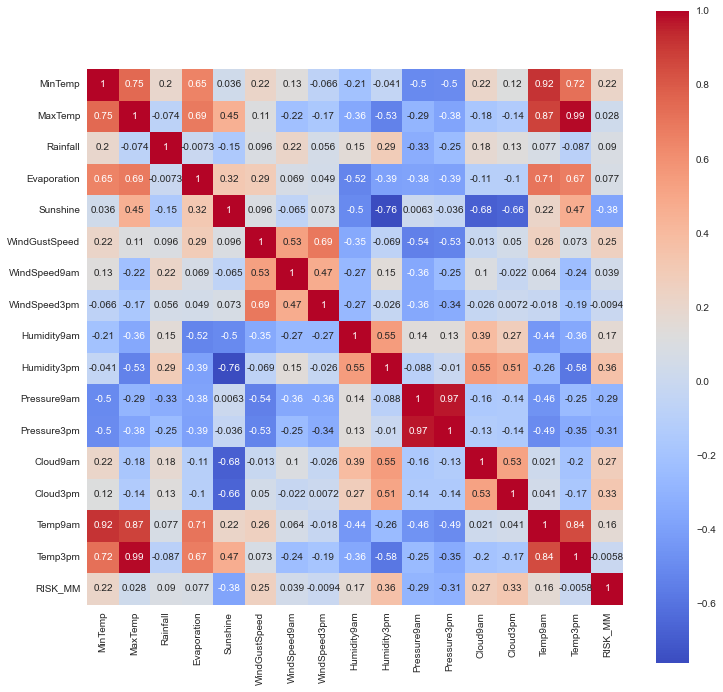

In [69]:
# Exploratory Data Analysis
plt.figure(figsize=(12,12))
sns.heatmap(weather_data.corr(),cmap='coolwarm',annot=True, square=True);

c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


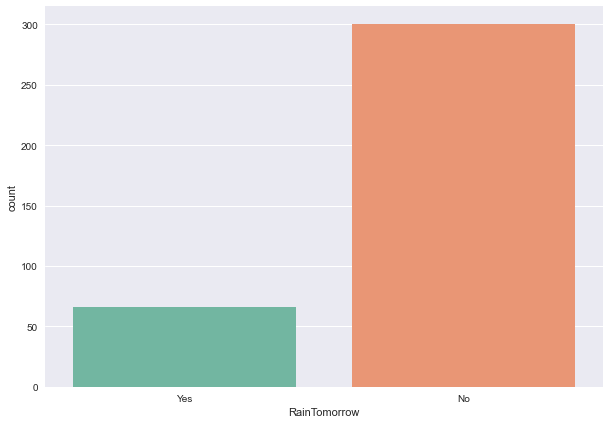

In [70]:
plt.figure(figsize=(10,7))
plt.style.use('seaborn')
sns.countplot(weather_data['RainTomorrow'], palette='Set2');

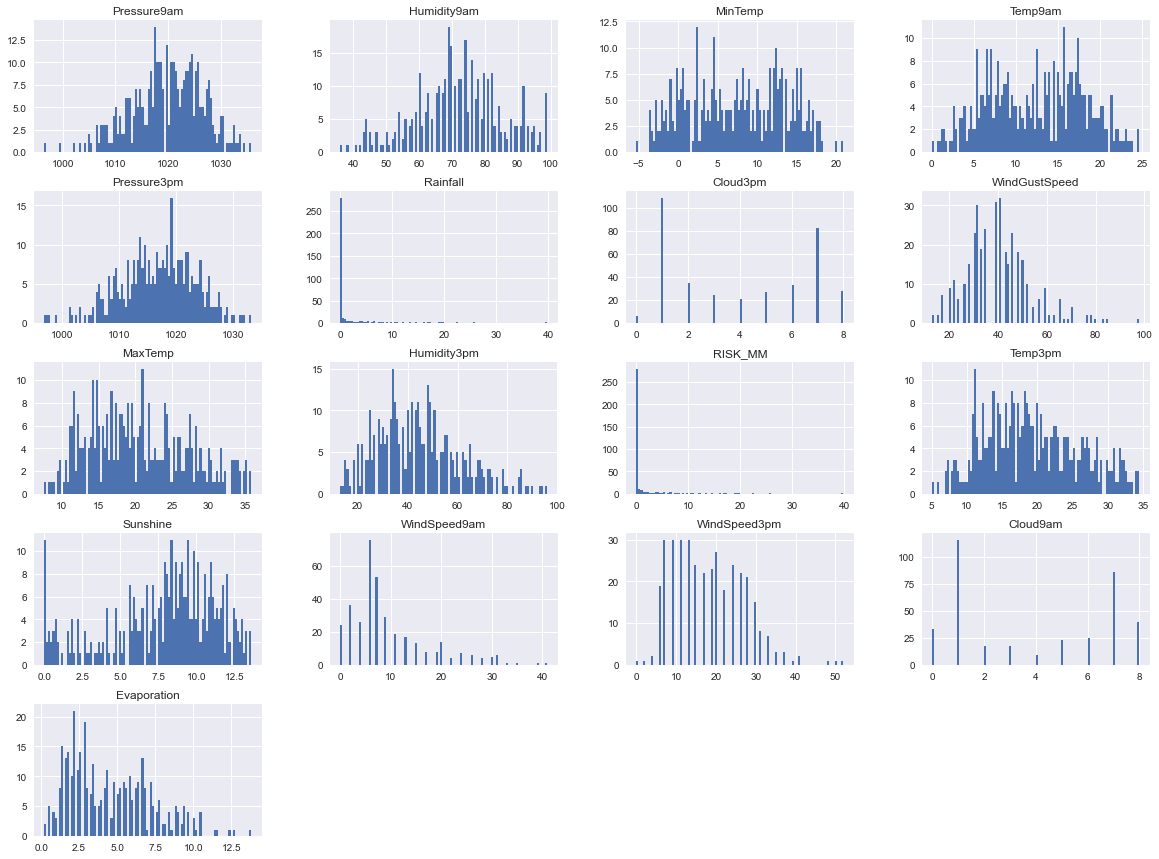

In [71]:
weather_data[num_cols[:]].hist(bins=100, figsize=(20,15));

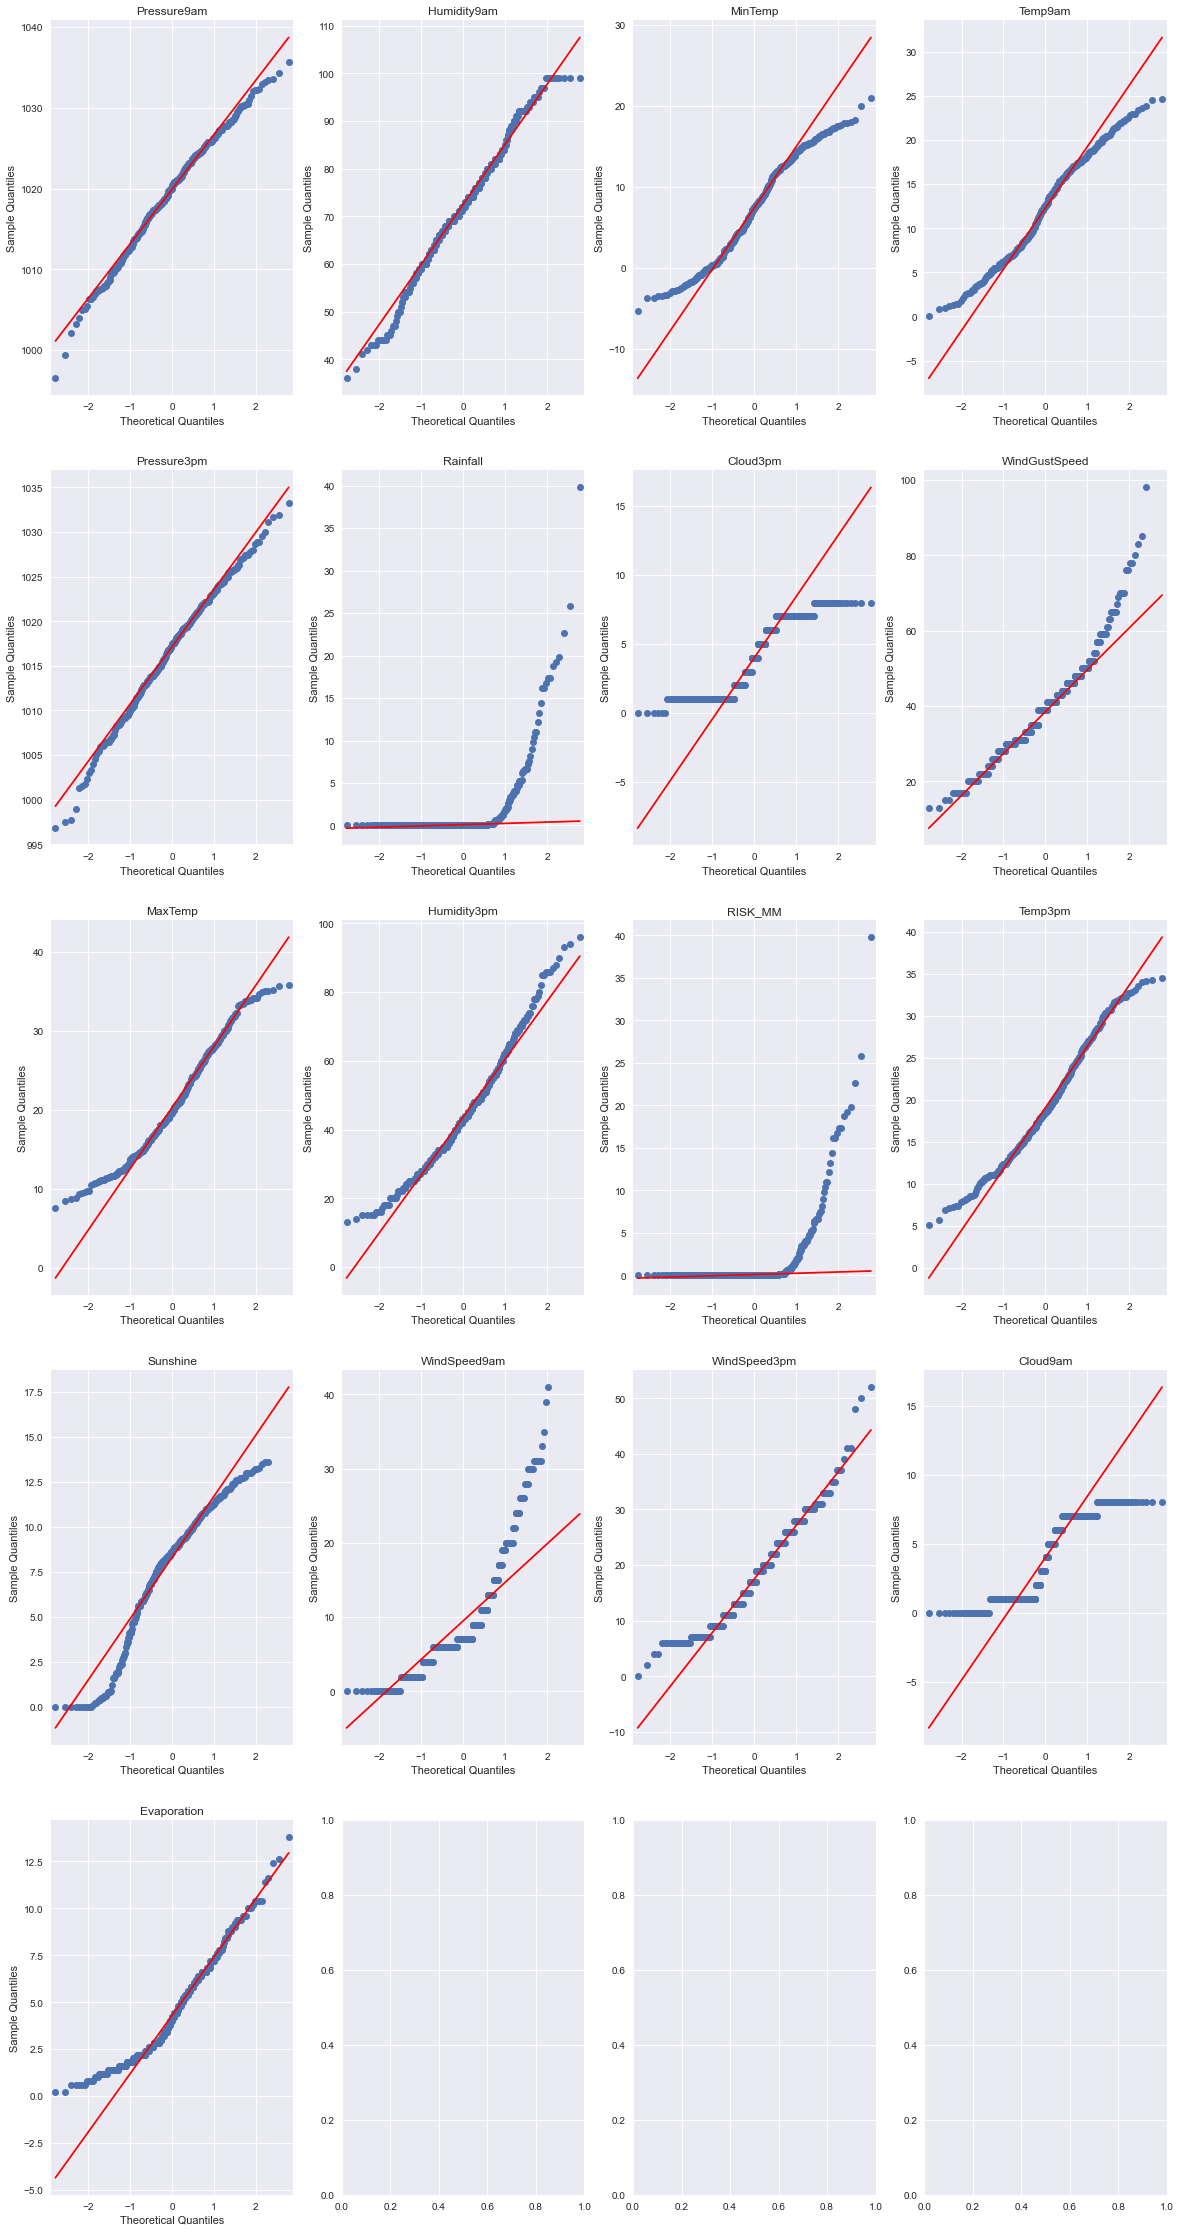

In [72]:
ncols = 4
nrows=5
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 40))
i=0
j=0
for col in num_cols:
    sm.qqplot(weather_data[col],fit = False, line='q', ax = axes[i, j])
    axes[i, j].set_title(col)
    if(j<ncols-1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

# Preprocessing

In [73]:
weather_data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [74]:
# drop null values
weather_data.dropna(inplace=True) 

# drop duplicated
weather_data.drop_duplicates(inplace=True) 

# drop columns
cols_to_drop = ['WindGustDir', 'MaxTemp', 'Evaporation', 'Temp3pm', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm',\
         'Humidity9am', 'Pressure9am', 'Pressure3pm', 'WindDir9am', 'WindDir3pm']
weather_data.drop(columns=cols_to_drop, inplace=True) 

In [75]:
def measure_skewness(data, num_cols):
    N = data.shape[0]
    mean = np.mean(data[num_cols])
    std = np.std(data[num_cols])
    skewness = ((data[num_cols] - mean)**3).sum() / ((N - 1) * (std**3))
    
    return skewness

def log_transform(data, num_cols, skewness):
    index = 1
    for c in num_cols:
        if abs(skewness[index]) > 1:
            data[c] = np.log(np.abs(data[c] + 1))
            index += 1
    return data

#--------------------------------------------------------------------------------------------

def lower_higher_outlier(data, num_cols):
    list_lower_outlier = []
    list_high_outlier = []
    for col in num_cols:
        Q1 = np.percentile(data[col], q = 25, interpolation = 'midpoint')
        Q3 = np.percentile(data[col], q = 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        lower_outlier = Q1 - 1.5 * IQR
        high_outlier = Q3 + 1.5 * IQR
        list_lower_outlier.append(lower_outlier)
        list_high_outlier.append(high_outlier)
    return list_lower_outlier, list_high_outlier

def clumb_outliers(data, num_cols, list_lower_outlier, list_high_outlier):
    index = 0
    for col in num_cols:
        high_outlier = list_high_outlier[index]
        lower_outlier = list_lower_outlier[index]
        data.loc[data[col] > high_outlier, col] = high_outlier
        data.loc[data[col] < lower_outlier, col] = lower_outlier
        index += 1
    return data
    
#--------------------------------------------------------------------------------

def resample_data(data):
    y_data = data.iloc[:,-1]
    target_classes = y_data.value_counts().sort_values()
    highest_target_class = target_classes.iloc[-1]
    target_classes_names = y_data.unique()

    for y_class in target_classes_names:
        over_df = data[ y_data == y_class]
        over_df = resample(over_df,random_state=42,n_samples = highest_target_class - target_classes[y_class])
        data = pd.concat([over_df, data])
        
    return data

#--------------------------------------------------------------------------------

def check_normal_distrubtion(data, num_cols):
    feats_std_scale = []
    feats_min_max_scale = []

    for col in num_cols:
        stat, p = shapiro(data[col])
        print('W_Statistic=%.3f, p=%.8f' % (stat, p))

        alpha = 0.001
        if p > alpha:
            print(f'{col} looks like gaussian (fail to reject H0)')
            feats_std_scale.append(col)
        else:
            print(f'{col} does not look Gaussian (reject H0)')
            feats_min_max_scale.append(col)
    return feats_min_max_scale, feats_std_scale

#--------------------------------------------------------------------------------

def drop_redundent_cols(data, num_cols, target):
    corr_matrix = weather_data[num_cols].corr()
    row_len = corr_matrix.values.shape[0]
    for row in range(row_len):
        for col in range (row + 1, row_len):
            if(np.abs(corr_matrix.values[row, col]) > 0.7):
                var_row_corr_with_response = np.abs(np.corrcoef(data[target], data[num_cols[row]])[0, 1])
                var_col_corr_with_response = np.abs(np.corrcoef(data[target], data[num_cols[col]])[0, 1])
                if var_row_corr_with_response > var_col_corr_with_response : 
                    print(num_cols[col])
                    data = data.drop(columns=num_cols[col])
                else:
                    print(num_cols[row])
                    data = data.drop(columns=num_cols[row])  
    return data

In [76]:
ordinal_encoding = {
                        'RainTomorrow': {"Yes": 1, "No": 0}
                    }
weather_data = weather_data.replace(ordinal_encoding)

In [77]:
num_cols = list(set(weather_data.describe().columns) - set(['RainTomorrow']))
cat_cols = list(set(weather_data.columns) - set(num_cols) - set(['RainTomorrow']))

In [78]:
# weather_data = drop_redundent_cols(weather_data, num_cols, 'RainTomorrow')

In [79]:
# split data into train and test data
train_data, test_data = train_test_split(weather_data, test_size=0.2, random_state=42)

In [80]:
train_data = resample_data(train_data)

c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


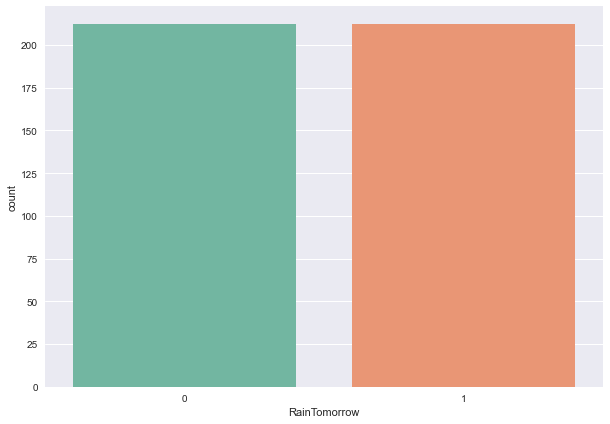

In [81]:
plt.figure(figsize=(10,7))
plt.style.use('seaborn')
sns.countplot(train_data['RainTomorrow'], palette='Set2');

In [82]:
list_lower_outlier, list_high_outlier = lower_higher_outlier(train_data, num_cols)
train_data = clumb_outliers(train_data, num_cols, list_lower_outlier, list_high_outlier)

test_data = clumb_outliers(test_data, num_cols,list_lower_outlier, list_high_outlier)

In [83]:
skewness = measure_skewness(train_data, num_cols)
train_data = log_transform(train_data, num_cols, skewness)

test_data = log_transform(test_data, num_cols, skewness)

c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [84]:
feats_min_max_scale, feats_std_scale = check_normal_distrubtion(train_data, num_cols)

W_Statistic=0.970, p=0.00000013
Temp9am does not look Gaussian (reject H0)
W_Statistic=0.959, p=0.00000000
MinTemp does not look Gaussian (reject H0)
W_Statistic=0.606, p=0.00000000
Rainfall does not look Gaussian (reject H0)
W_Statistic=0.850, p=0.00000000
Cloud3pm does not look Gaussian (reject H0)
W_Statistic=0.946, p=0.00000000
WindGustSpeed does not look Gaussian (reject H0)
W_Statistic=0.977, p=0.00000360
Humidity3pm does not look Gaussian (reject H0)
W_Statistic=0.753, p=0.00000000
RISK_MM does not look Gaussian (reject H0)
W_Statistic=0.809, p=0.00000000
Cloud9am does not look Gaussian (reject H0)


In [85]:
print('Features Min Max Scaler: ',feats_min_max_scale)
print('\nFeatures Standard Scaler: ',feats_std_scale)

Features Min Max Scaler:  ['Temp9am', 'MinTemp', 'Rainfall', 'Cloud3pm', 'WindGustSpeed', 'Humidity3pm', 'RISK_MM', 'Cloud9am']

Features Standard Scaler:  []


In [86]:
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
# fitting
min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
# std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
# transforming min_max_scale
min_max_scaled_train_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)
min_max_scaled_test_data = pd.DataFrame(min_max_scaler_model.transform(test_data[feats_min_max_scale]), columns = feats_min_max_scale)

# tranforming std_scale
# std_scaled_train_data =pd.DataFrame( std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)
# std_scaled_test_data =pd.DataFrame( std_scaler_model.transform(test_data[feats_std_scale]), columns = feats_std_scale)

In [87]:
# label encoding of the Gender
one_hot_enc_model = OneHotEncoder(sparse = False).fit(train_data[['RainToday']])
ohe_train_data = one_hot_enc_model.transform(train_data[['RainToday']])
ohe_test_data = one_hot_enc_model.transform(test_data[['RainToday']])

a=one_hot_enc_model.categories_
col_names=[]
for list_ in a:
    for element in list_:
        col_names.append(element)

nominal_train_df = pd.DataFrame(ohe_train_data, columns = col_names)
nominal_test_df = pd.DataFrame(ohe_test_data, columns = col_names)

In [88]:
num_train_df = min_max_scaled_train_data.merge(train_data[['MinTemp',
       'WindGustSpeed','Cloud9am', 'Cloud3pm','Humidity3pm', 'Temp9am',
       'RISK_MM','RainTomorrow']], right_index = True, left_index = True)

num_test_df = min_max_scaled_test_data.merge(test_data[['MinTemp',
       'WindGustSpeed','Cloud9am', 'Cloud3pm','Humidity3pm', 'Temp9am',
       'RISK_MM','RainTomorrow']], right_index = True, left_index = True)

In [89]:
num_train_df.head()

,Temp9am_x,MinTemp_x,Rainfall,Cloud3pm_x,WindGustSpeed_x,Humidity3pm_x,RISK_MM_x,Cloud9am_x,MinTemp_y,WindGustSpeed_y,Cloud9am_y,Cloud3pm_y,Humidity3pm_y,Temp9am_y,RISK_MM_y,RainTomorrow
0,0.691983,0.560976,0.0,1.000,0.427481,0.2875,0.415385,0.125,8.0,30.0,7,7.0,29,14.4,3.6,1
0,0.691983,0.560976,0.0,1.000,0.427481,0.2875,0.415385,0.125,8.0,30.0,7,7.0,29,14.4,3.6,1
0,0.691983,0.560976,0.0,1.000,0.427481,0.2875,0.415385,0.125,8.0,30.0,7,7.0,29,14.4,3.6,1
0,0.691983,0.560976,0.0,1.000,0.427481,0.2875,0.415385,0.125,8.0,30.0,7,7.0,29,14.4,3.6,1
1,0.565401,0.475610,0.0,0.875,0.259542,0.2000,0.276923,0.875,14.0,39.0,5,3.0,36,17.5,3.6,1


In [90]:
num_test_df.head()

,Temp9am_x,MinTemp_x,Rainfall,Cloud3pm_x,WindGustSpeed_x,Humidity3pm_x,RISK_MM_x,Cloud9am_x,MinTemp_y,WindGustSpeed_y,Cloud9am_y,Cloud3pm_y,Humidity3pm_y,Temp9am_y,RISK_MM_y,RainTomorrow
3,0.518987,0.491870,1.0,0.125,0.274809,0.2375,0.0,0.875,13.3,54.0,2,7.0,56,13.5,2.8,1
5,0.046414,0.089431,0.0,0.375,0.030534,0.3500,0.0,0.500,6.2,44.0,7,5.0,57,10.9,0.2,0
7,0.443038,0.581301,1.0,0.875,0.427481,0.6500,0.0,1.000,8.3,41.0,6,7.0,57,12.1,0.0,0
9,0.548523,0.520325,0.0,0.875,0.427481,0.3000,0.0,0.125,8.4,31.0,7,1.0,32,13.3,0.0,0
16,0.510549,0.540650,0.0,0.625,0.671756,0.3625,0.0,0.250,13.8,44.0,7,6.0,23,20.2,1.2,1


In [91]:
X_train = num_train_df.drop(columns =['RainTomorrow'])
y_train = num_train_df[['RainTomorrow']]

X_validation = num_test_df.drop(columns =['RainTomorrow'])
y_validation = num_test_df[['RainTomorrow']]

# Models

### Features Selection

In [92]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC


lsvc = LinearSVC(C=0.1, penalty="l2", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_validation = model.transform(X_validation)
X_train.shape

c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(424, 3)

## Logistic Regression

### Logistic Regression From Scratch

In [93]:
def initialize(X):
  weights = np.zeros((X.shape[1],1))
  return weights,X

def sigmoid(z):
  return 1/(1 + np.e**(-z))

def loss(X, y, theta):
  z = np.dot(X,theta) 
  return -(( (1-y).T.dot(np.log(1-sigmoid(z))) + y.T.dot(np.log(sigmoid(z)))))/len(y)

def fit(X, y, lr, iterations):
  wights ,X = initialize(X)
  for _ in range(iterations):
      wights = wights - lr * np.dot(X.T, sigmoid(np.dot(X,wights)) - np.reshape(y,(len(y),1)))
  return wights

def predict(X, weights, threshold):
  z = np.dot(initialize(X)[1], weights)
  predictions = []
  for i in sigmoid(z):
      if i>threshold:
          predictions.append(1)
      else:
          predictions.append(0)
  return predictions

In [94]:
weights = fit(X_train, y_train, 0.01, 100)
test_preds = predict(X_validation, weights, 0.7)
score = r2_score(y_validation,test_preds)
print('Test Score = ', score)

Test Score =  1.0


### Logistic Regression From Sklearn

In [95]:
log_reg = LogisticRegression(max_iter=400).fit(X_train, y_train)
y_pred_sklearn = log_reg.predict(X_validation)
score = r2_score(y_validation,y_pred_sklearn)
print('Test Score = ', score)

Test Score =  1.0


c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## SVC

In [96]:
# rbf
score_ls=[]
c_ls=[]
for i in range(5,50):
    svc_model = SVC(kernel='rbf', C=i, gamma=0.001, probability=True).fit(X_train, y_train)
    y_pred_sklearn = svc_model.predict(X_validation)
    score = r2_score(y_validation,y_pred_sklearn)
    score_ls.append(score)
    c_ls.append(i)

c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [97]:
max = np.max(score_ls)
index = score_ls.index(max)
print(max)
c_ls[index]

1.0


7

In [98]:
svc_model = SVC(kernel='rbf', C=7, gamma=0.001, probability=True).fit(X_train, y_train)
y_pred_sklearn = svc_model.predict(X_validation)
score = r2_score(y_validation,y_pred_sklearn)
print('Test Score = ', score)

Test Score =  1.0


c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
#poly
list_score=[]
list_c=[]
degree_list=[]
for i in range(5,50):
    for d in range(1,20):
        gamma = 0.001
        svc_model = SVC(kernel='poly', C=i, gamma=0.01).fit(X_train, y_train)
        y_pred_sklearn = svc_model.predict(X_validation)
        score = r2_score(y_validation, y_pred_sklearn)
        list_score.append(score)
        list_c.append(i)
        degree_list.append(d)


c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [100]:
max = np.max(list_score)
index = list_score.index(max)
print('best C = ',list_c[index])
print('best poly = ',degree_list[index])

best C =  44
best poly =  1


In [101]:
svc_model = SVC(kernel='poly', degree=1, C=44, gamma=0.01, probability=True).fit(X_train, y_train)
y_pred_sklearn = svc_model.predict(X_validation)
score = r2_score(y_validation,y_pred_sklearn)
print('Test Score = ', score)

Test Score =  1.0


c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
# linear
score_ls=[]
c_ls=[]
for i in range(5,50):
    svc_model = SVC(kernel='linear', C=i, gamma=0.001, probability=True).fit(X_train, y_train)
    y_pred_sklearn = svc_model.predict(X_validation)
    score = r2_score(y_validation,y_pred_sklearn)
    score_ls.append(score)
    c_ls.append(i)

c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [103]:
max = np.max(score_ls)
index = score_ls.index(max)
print(max)
c_ls[index]

1.0


5

In [104]:
svc_model = SVC(kernel='linear', C=5, gamma=0.001, probability=True).fit(X_train, y_train)
y_pred_sklearn = svc_model.predict(X_validation)
score = r2_score(y_validation,y_pred_sklearn)
print('Test Score = ', score)

Test Score =  1.0


c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## KNN

### KNN from scratch

In [112]:
def euclidean(point1, pint2):
    return np.sqrt(np.sum(np.power((point1-pint2), 2)))
 
def predict(X, y , x_test, k):
    y_prediction = []
     
    for row_test in x_test: 
        points = []
        for i in range(len(X)): 
            points.append(euclidean(np.array(X[i,:]) , row_test)) 

        points = np.array(points)  
        labels = y.iloc[np.argsort(points)[:k]] 
        lab = mode(labels) 
        lab = lab.mode[0]
        y_prediction.append(lab)
 
    return y_prediction

y_pred = predict(X_train,y_train,X_validation , 3)
score = r2_score(y_validation, y_pred)
print('Test Score = ', score)

Test Score =  1.0


### KNN from sklearn

In [106]:
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_sklearn = knn_model.predict(X_validation)
score = r2_score(y_validation, y_pred_sklearn)
print('Test Score = ', score)

Test Score =  1.0


c:\Users\Fathi-Muhammad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Decision Tree

Test Score =  1.0


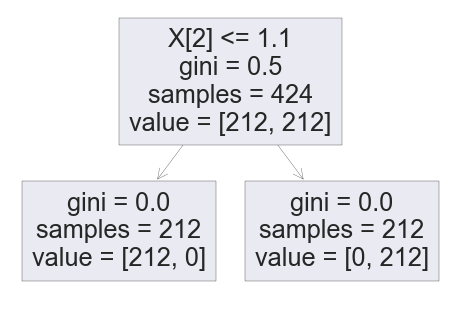

In [107]:
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5, criterion="gini", splitter="best", min_samples_split=5, max_leaf_nodes=10).fit(X_train, y_train)
y_pred_sklearn = decision_tree.predict(X_validation)
score = r2_score(y_validation, y_pred_sklearn)
print('Test Score = ', score)
plot_tree(decision_tree);

In [108]:
# All Implementations 'From Scratch, Sklearn' have same accuracy 100% on test data